In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [21]:
df=pd.read_csv("Group_13_data_cleaned.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


# First taking Nox as target variable and performing Linear Regression 

In [22]:
#  the data for the model
# selecting only NOX as target variable
nox_df = df.copy()
nox_df = nox_df.drop("CO", axis = 1) # drop the target variable CO

In [23]:
nox_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,64.738


<AxesSubplot:>

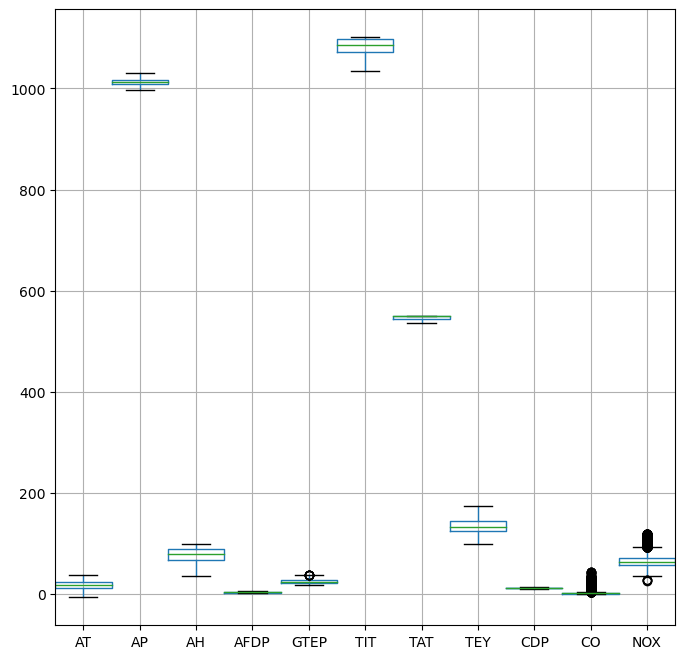

In [24]:
# Identifying the outliers in the dataset
df.boxplot(figsize = (8, 8), widths = 1)

In [25]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = nox_df.iloc[:, :-1]
y = nox_df["NOX"]


In [26]:
# normalize the X and y. 
X = nox_ds1 = Normalizer().fit_transform(X)
# normalize the data 


X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  test_size = 0.3,random_state= 42, shuffle = True)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state = 42)

In [27]:
X_train.shape,X_valid.shape,X_test.shape,y_train.shape,y_valid.shape,y_test.shape

((19284, 9), (6429, 9), (11020, 9), (19284,), (6429,), (11020,))

In [28]:
from sklearn.linear_model import LinearRegression
# Create a LinearRegression object
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
w = lr.coef_
b = lr.intercept_
w, b

(array([-3141.43559987, -7481.53698837,  -866.20748353,  1427.50791596,
         -372.25305499, -5020.66863446, -7249.58281031, -4069.46174705,
        -7669.03256253]),
 11236.77153044927)

In [30]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
y_pred = lr.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("MAE on valid set:", round (mae, 3))
print("MSE on valid set is:", round(mse, 3))
print(f"RMSE on the valid set: {np.sqrt(mse)}")


MAE on valid set: 5.374
MSE on valid set is: 55.002
RMSE on the valid set: 7.41633846875917


In [31]:
y_pred = lr.predict(X_valid) 
r2_score(y_valid, y_pred)

0.5979224242879776

In [32]:
# Use GridSearchCV to select hyper-parameters

### Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)
cv_scores_1 = cross_val_score(LinearRegression(), 
                            X_train, 
                            y_train, 
                            cv=5,
                            scoring='r2')

cv_scores_1

array([0.59964285, 0.5909683 , 0.59923087, 0.58756363, 0.59915666])

In [34]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='r2')

In [35]:
# Best metrics for training set
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 1e-08}
0.5953124741511165


In [36]:
y_pred = ridge_regressor.predict(X_test)
r2_score(y_test, y_pred)

0.5786012933714322

In [37]:
# make predictions on the test set
y_pred_test = ridge_regressor.predict(X_test)

# calculate the MAE for the test set
mae_val = mean_absolute_error(y_test, y_pred_test)
# calculate the MSE for the test set
mse_val = mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_val)
print("Mean Squared Error: ", mse_val)
print(f"RMSE : {np.sqrt(mse_val)}")

Mean Absolute Error:  5.467713953317597
Mean Squared Error:  55.84199438423379
RMSE : 7.472750121891792


In [38]:
rg_prediction=ridge_regressor.predict(X_train)

In [39]:
# Using Naive Base function to calculate mean absolute error
def mae(y_true, rg_prediction):
    return np.mean(abs(y_true - rg_prediction))

baseline_guess = np.median(y)
print('the baseline score is %0.2f' % baseline_guess) 
print("Baseline performance on the test set :MAE = %0.4f" % mae (y_train, baseline_guess))

the baseline score is 63.85
Baseline performance on the test set :MAE = 8.8124


# As we could see the baseline performance, so we can implement machine learning algorithms to our dataset

### CO target variable

In [4]:
# prepare the data for the model
# select the only CO as target variabel
co_df = df.copy()
co_df = co_df.drop("NOX", axis = 1) # drop the target variable CO

In [5]:
co_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340


In [6]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = co_df.iloc[:, :-1]
y = co_df["CO"]


In [7]:
X = co_df1 = Normalizer().fit_transform(X)
# normalize the data 

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  test_size = 0.3,random_state= 42, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)
cv_scores_2 = cross_val_score(LinearRegression(), 
                            X_train, 
                            y_train, 
                            cv=5,
                            scoring='r2')

cv_scores_2

array([0.59667531, 0.58305442, 0.58512359, 0.47055364, 0.54451122])

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression ()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
# Create a LinearRegression object for validation set
lr = LinearRegression()
lr.fit(X_valid, y_valid)

y_pred = lr.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("MAE on valid set:", round (mae, 3))
print("MSE on valid set is:", round(mse, 3))
print(f"RMSE on the valid set: {np.sqrt(mse)}")


MAE on valid set: 0.864
MSE on valid set is: 2.873
RMSE on the valid set: 1.694923937946765


In [13]:
# Model Structure Selection to select hyperparameters

In [14]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)
cv_scores_2 = cross_val_score(LinearRegression(), 
                            X_train, 
                            y_train, 
                            cv=5,
                            scoring='r2')

cv_scores_2

array([0.59667531, 0.58305442, 0.58512359, 0.47055364, 0.54451122])

In [15]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='r2',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='r2')

In [16]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
0.5559836368160778


In [17]:
y_pred = ridge_regressor.predict(X_test)
r2_score(y_test, y_pred)

0.5381473833703817

In [18]:
# make predictions on the test set
y_pred_test = ridge_regressor.predict(X_test)

# calculate the MAE for the test set
mae_val = mean_absolute_error(y_test, y_pred_test)
# calculate the MSE for the test set
mse_val = mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_val)
print("Mean Squared Error: ", mse_val)
print(f"RMSE : {np.sqrt(mse_val)}")

Mean Absolute Error:  0.8575684092865549
Mean Squared Error:  2.511386828520116
RMSE : 1.5847355705353863


In [19]:
rg_prediction=ridge_regressor.predict(X_test)
# Using Naive Base function to calculate mean absolute error
def mae(y_true, rg_prediction):
    return np.mean(abs(y_true- rg_prediction))

baseline_guess = np.median(y)
print('the baseline score is %0.2f' % baseline_guess) 
print("Baseline performance on the test set :MAE = %0.4f" % mae(y_test, baseline_guess))

the baseline score is 1.71
Baseline performance on the test set :MAE = 1.2674
